In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, r2_score, confusion_matrix, classification_report

 Набор данных CLAIM содержит информацию страховой компании о деятельности в сфере автострахования – 10300 строк (количество страховых полисов) и 23 переменные:

In [ ]:
data = pd.read_csv('CLAIM.csv', delimiter=',')
pd.set_option('display.max_columns', None)
data.head()

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,JOB,DISTANCE,CAR_USE,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
0,6.921625e+09,0,67.0,0,14.0,"$53,841","$359,229",z_No,Mal,Bachelors,None,71,Private,"$21,970",Family,0,No,2,$294,12.0,0,Highly Urban/ Urban,Berlin
1,1.227899e+09,0,26.0,1,13.0,"$16,999","$265,527",NaN,Fem,z_High School,Clerical,50,Private,"$4,010",unknown,4,No,7,$292,12.0,0,Highly Urban/ Urban,Thueringen
2,1.950524e+09,0,71.0,0,17.0,NaN,"$323,918",Yes,Mal,<High School,Teacher,77,Private,"$15,440",Minivan,0,No,0,$387,8.0,0,Highly Urban/ Urban,Bayern
3,1.743448e+09,0,68.0,0,NaN,"$115,546","$361,705",Yes,Fem,PhD,Doctor,81,Private,"$18,000",unknown,4,Yes,3,$308,19.0,0,Highly Urban/ Urban,Bayern
4,7.371333e+09,0,32.0,1,15.0,"$125,861","$70,668",z_No,Fem,Bachelors,Teacher,91,Commercial,"$17,430",Sports Car,0,No,0,"$3,221",9.0,1,Highly Urban/ Urban,Bayern




**ID** -  идентификатор страхового полиса

**Age** – возраст автовладельца

**Сhildren** – количество детей

**Сhildren drive** - количество детей с правами

**Incom** – доход

**YOJ** – стаж работы автовладельца

**Gender** – пол

**Job** - профессия 

**Edu_level** -  уровень образования

**Distance** – расстояние от дома до работы страхователя

**Car_use** -  для какой цели используется автомобиль (по работе или для личных нужд)

**Vehicle_value** – стоимость автомобиля

**Vehicle_type** – тип автомобиля

**Vehicle_age** – возраст автомобиля

**Clm_freq** -  количество обращений по страховому случаю за последние 10 лет

**Revoked** –  лишение прав за последние 10 лет

**MVR_PTC** – количество штрафов автовладельца за последние 10 лет

**Status** – семейное положение страхователя

**Area** – тип населенного пункта, в котором проживает страхователь

**House_value** -  стоимость дома

**State_code** -  название города

**Claim_IND** – бинарная переменная (факт обращения по страховому случаю) 

**Claim_amount** –  сумма, выплаченная по страховому случаю


In [ ]:
data.describe()

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,DISTANCE,CLM_FREQ,MVR_PTS,VEHICLE_AGE,CLAIM_IND
count,1.030000e+04,10300.000000,10293.000000,10300.000000,9752.000000,10300.000000,10300.000000,10300.000000,9661.000000,10300.000000
mean,4.536920e+09,0.170000,53.797921,0.720971,13.473954,78.419417,1.808641,3.202621,10.297899,0.266602
std,3.054715e+09,0.507381,13.172204,1.116310,4.109358,15.869675,1.528187,2.585899,5.713707,0.442204
min,1.130032e+07,0.000000,5.000000,0.000000,3.000000,50.000000,0.000000,0.000000,-1.000000,0.000000
25%,2.135318e+09,0.000000,45.000000,0.000000,12.000000,67.000000,0.000000,2.000000,3.000000,0.000000
50%,3.964367e+09,0.000000,54.000000,0.000000,14.000000,78.000000,2.000000,3.000000,10.000000,0.000000
75%,6.280446e+09,0.000000,63.000000,1.000000,16.000000,89.000000,3.000000,5.000000,14.000000,1.000000
max,2.017790e+10,4.000000,103.000000,5.000000,26.000000,187.000000,7.000000,17.000000,30.000000,1.000000


In [ ]:
data = data.fillna(data.mode().iloc[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10300 non-null  float64
 1   CHILD_DRIV    10300 non-null  int64  
 2   AGE           10300 non-null  float64
 3   CHILDREN      10300 non-null  int64  
 4   YOJ           10300 non-null  float64
 5   INCOME        10300 non-null  object 
 6   HOUSE_VAL     10300 non-null  object 
 7   STATUS        10300 non-null  object 
 8   GENDER        10300 non-null  object 
 9   EDU_LEVEL     10300 non-null  object 
 10  JOB           10300 non-null  object 
 11  DISTANCE      10300 non-null  int64  
 12  CAR_USE       10300 non-null  object 
 13  VEHICLE_VAL   10300 non-null  object 
 14  VEHICLE_TYPE  10300 non-null  object 
 15  CLM_FREQ      10300 non-null  int64  
 16  REVOKED       10300 non-null  object 
 17  MVR_PTS       10300 non-null  int64  
 18  CLAIM_AMOUNT  10300 non-nu

In [ ]:
data.dtypes

ID              float64
CHILD_DRIV        int64
AGE             float64
CHILDREN          int64
YOJ             float64
INCOME           object
HOUSE_VAL        object
STATUS           object
GENDER           object
EDU_LEVEL        object
JOB              object
DISTANCE          int64
CAR_USE          object
VEHICLE_VAL      object
VEHICLE_TYPE     object
CLM_FREQ          int64
REVOKED          object
MVR_PTS           int64
CLAIM_AMOUNT     object
VEHICLE_AGE     float64
CLAIM_IND         int64
AREA             object
STATE_CODE       object
dtype: object

In [ ]:
data['INCOME'] = [x.replace('$','') for x in data['INCOME'].values]
data['HOUSE_VAL'] = [x.replace('$','') for x in data['HOUSE_VAL'].values]
data['VEHICLE_VAL'] = [x.replace('$','') for x in data['VEHICLE_VAL'].values]
data['CLAIM_AMOUNT'] = [x.replace('$','') for x in data['CLAIM_AMOUNT'].values]
data['INCOME'] = [x.replace(',','') for x in data['INCOME'].values]
data['HOUSE_VAL'] = [x.replace(',','') for x in data['HOUSE_VAL'].values]
data['VEHICLE_VAL'] = [x.replace(',','') for x in data['VEHICLE_VAL'].values]
data['CLAIM_AMOUNT'] = [x.replace(',','') for x in data['CLAIM_AMOUNT'].values]
data['EDU_LEVEL'] = [x.replace('z_','') for x in data['EDU_LEVEL'].values]
data['EDU_LEVEL'] = [x.replace('<','') for x in data['EDU_LEVEL'].values]
data['STATUS'] = [x.replace('z_','') for x in data['STATUS'].values]
data['AREA'] = [x.replace('z_','') for x in data['AREA'].values]
data.head(10)

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,JOB,DISTANCE,CAR_USE,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
0,6.921625e+09,0,67.0,0,14.0,53841,359229,No,Mal,Bachelors,None,71,Private,21970,Family,0,No,2,294,12.0,0,Highly Urban/ Urban,Berlin
1,1.227899e+09,0,26.0,1,13.0,16999,265527,Yes,Fem,High School,Clerical,50,Private,4010,unknown,4,No,7,292,12.0,0,Highly Urban/ Urban,Thueringen
2,1.950524e+09,0,71.0,0,17.0,960,323918,Yes,Mal,High School,Teacher,77,Private,15440,Minivan,0,No,0,387,8.0,0,Highly Urban/ Urban,Bayern
3,1.743448e+09,0,68.0,0,15.0,115546,361705,Yes,Fem,PhD,Doctor,81,Private,18000,unknown,4,Yes,3,308,19.0,0,Highly Urban/ Urban,Bayern
4,7.371333e+09,0,32.0,1,15.0,125861,70668,No,Fem,Bachelors,Teacher,91,Commercial,17430,Sports Car,0,No,0,3221,9.0,1,Highly Urban/ Urban,Bayern
5,4.792606e+09,0,60.0,0,15.0,19715,141336,Yes,Fem,High School,Teacher,78,Private,8780,unknown,0,No,0,308,3.0,0,Highly Urban/ Urban,Bayern
6,7.008255e+09,1,49.0,1,14.0,51375,530010,Yes,Mal,High School,None,66,Private,18930,Minivan,3,No,2,6658,3.0,1,Highly Urban/ Urban,Bayern
7,6.003886e+09,0,68.0,2,15.0,44446,111891,No,Fem,High School,Teacher,75,Commercial,5900,unknown,0,No,2,203,12.0,0,Highly Rural/ Rural,Bayern
8,4.892513e+09,1,58.0,2,15.0,108921,480905,Yes,Mal,Bachelors,Teacher,89,Commercial,16970,Van,1,Yes,10,4312,9.0,1,Highly Urban/ Urban,Bayern
9,3.577688e+09,0,23.0,0,13.0,64338,300339,No,Fem,Bachelors,Clerical,79,Private,11200,unknown,0,No,4,2734,3.0,1,Highly Urban/ Urban,Berlin


Проведем одномерный анализ (Анализ каждого признака независимо от других)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


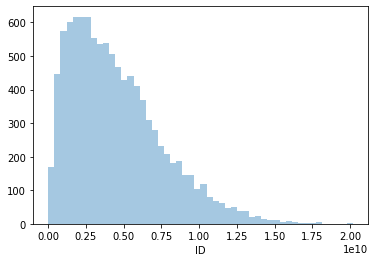

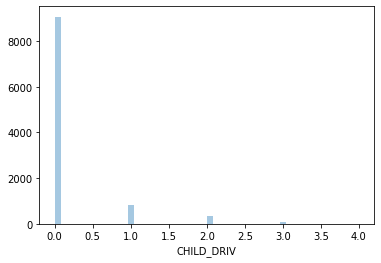

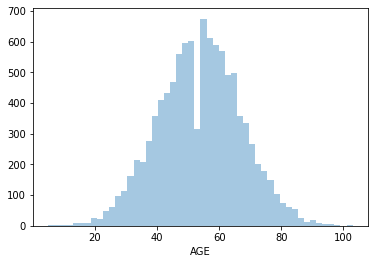

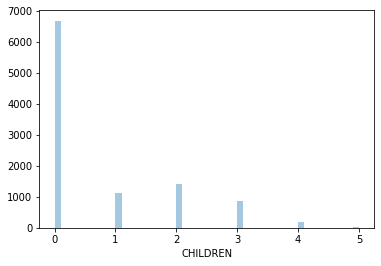

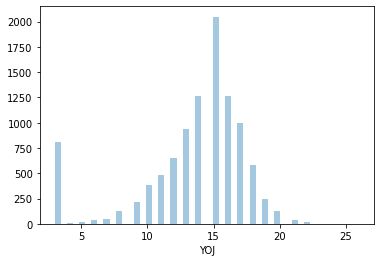

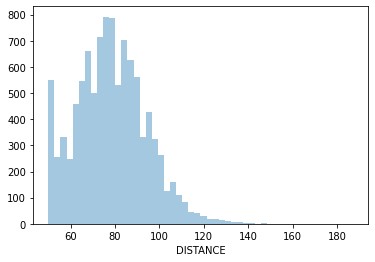

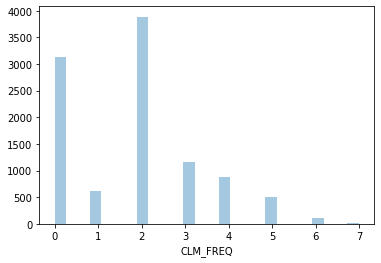

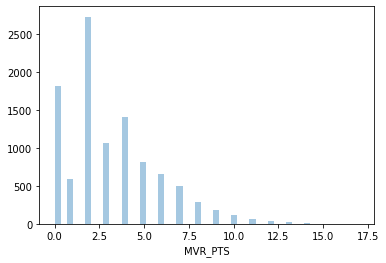

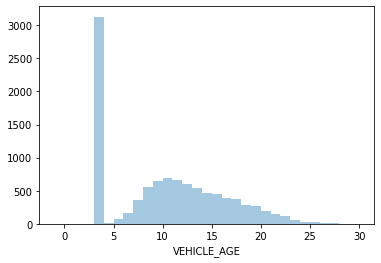

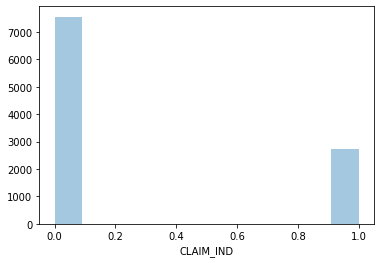

In [ ]:
for i in data.var().index:
    sns.distplot(data[i],kde=False)
    plt.show()

Проведем Бивариантный анализ Корреляция – связь между двумя метрическими переменными. При построении корреляции, мы ищем признаки, зависимые друг от друга или каким-либо образом влияющие на значения друг друга. Коэффициент корреляции признака с самим собой всегда равен единице, это значение не должно учитываться при исследовании зависимостей. Удобное представление коэффициентов корреляции - тепловая карта, представленная ниже:

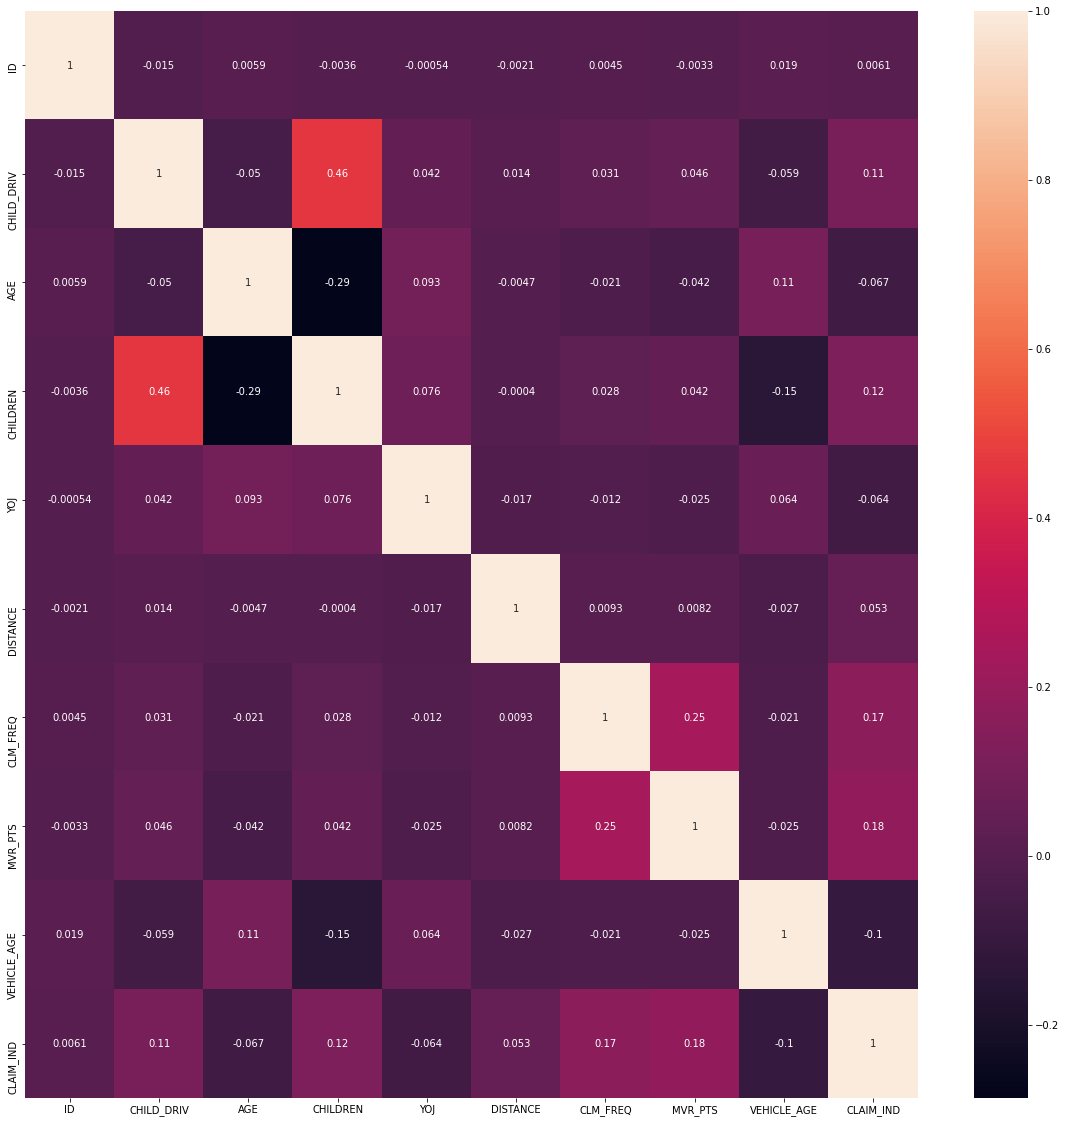

In [ ]:
plt.figure(figsize=(20, 20))
correlation_matrix = data.corr()  
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
c_target = abs(correlation_matrix['CLAIM_IND'])
rf = c_target[c_target >= 0.2].drop('CLAIM_IND')
print(rf)

Series([], Name: CLAIM_IND, dtype: float64)


Проведя анализ, мы видим, что AREA - тип населенного пункта, в котором проживает страхователь больше всего влияют на факт обращения по страховому случаю.

Посмотрим, как годовое состояние машины влияет на факт обращения по страховому случаю

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


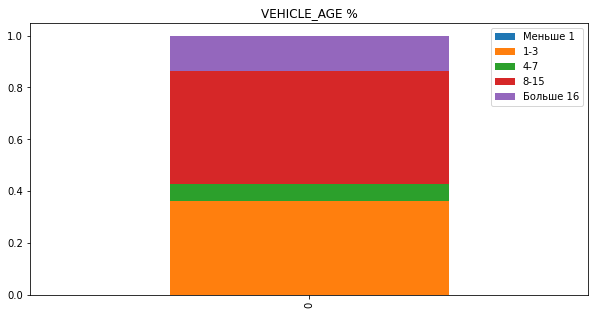

,Меньше 1,1-3,4-7,8-15,Больше 16
Vehicle age,0.0,0.362345,0.063365,0.436999,0.136926


In [ ]:
data1 = data[data['CLAIM_IND'] == 1]
data1['Vehicle age'] = pd.cut(data1['VEHICLE_AGE'], [0,1,3,7,15,100], labels=['Меньше 1', '1-3', '4-7', '8-15', 'Больше 16'])

temp_list = [x for x in data1['Vehicle age'] if x == 'Меньше 1']
GP1 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Vehicle age'] if x == '1-3']
GP2 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Vehicle age'] if x == '4-7']
GP3 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Vehicle age'] if x == '8-15']
GP4 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Vehicle age'] if x == 'Больше 16']

GP5 = len(temp_list)/len(data1)

dataForInpt = {'Меньше 1': [GP1], '1-3': [GP2], '4-7':[GP3], '8-15':[GP4], 'Больше 16':[GP5]}
data3 = pd.DataFrame.from_dict(dataForInpt)

data3.plot.bar(stacked=True, title ='VEHICLE_AGE %',figsize=(10,5))
plt.show()
plt.close()

data3.rename(index={0: 'Vehicle age'})

Как мы видим, владельцы автомобилей 8-15 летней давности чаще всего обращаются по страховым случаям

Теперь анализиируем данные по возрасту автовладельцев

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


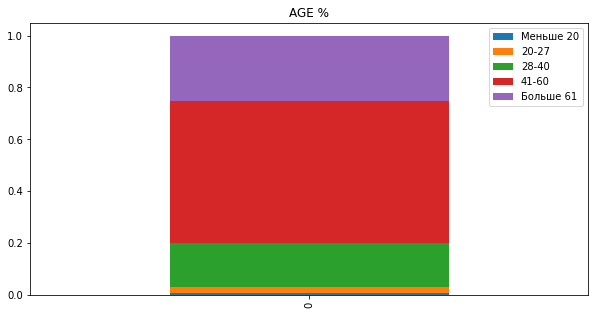

,Меньше 20,20-27,28-40,41-60,Больше 61
Age group,0.007647,0.021486,0.171158,0.546613,0.253095


In [ ]:
data1 = data[data['CLAIM_IND'] == 1]
data1['Age group'] = pd.cut(data1['AGE'], [0,19,27,40,61,110], labels=['Меньше 20', '20-27', '28-40', '41-60', 'Больше 61'])

temp_list = [x for x in data1['Age group'] if x == 'Меньше 20']
GP1 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Age group'] if x == '20-27']
GP2 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Age group'] if x == '28-40']
GP3 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Age group'] if x == '41-60']
GP4 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Age group'] if x == 'Больше 61']
GP5 = len(temp_list)/len(data1)

dataForInpt = {'Меньше 20': [GP1], '20-27': [GP2], '28-40':[GP3], '41-60':[GP4], 'Больше 61':[GP5]}
data3 = pd.DataFrame.from_dict(dataForInpt)

data3.plot.bar(stacked=True, title ='AGE %',figsize=(10,5))
plt.show()
plt.close()

data3.rename(index={0: 'Age group'})

Как мы видим, автовладельцы в возрасте от 41 до 60 лет чаще обращаются по страховым случаям

Проанализируем данные о количестве штрафов автовладельца за последние 10 лет




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


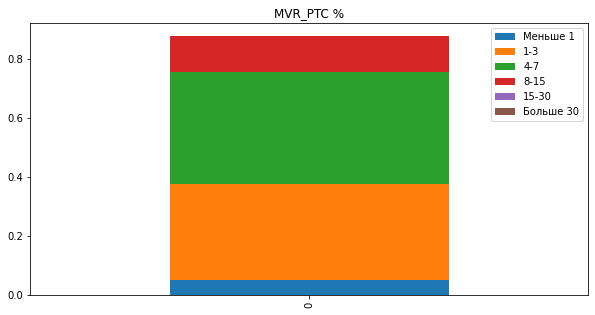

,Меньше 1,1-3,4-7,8-15,15-30,Больше 30
Mvr_tcp,0.050983,0.323379,0.379825,0.124181,0.000364,0.0


In [ ]:
data1 = data[data['CLAIM_IND'] == 1]
data1['Mvr_tcp'] = pd.cut(data1['MVR_PTS'], [0,1,3,7,15,30,500], labels=['Меньше 1', '1-3', '4-7', '8-15', '15-30', 'Больше 30'])

temp_list = [x for x in data1['Mvr_tcp'] if x == 'Меньше 1']
GP1 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Mvr_tcp'] if x == '1-3']
GP2 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Mvr_tcp'] if x == '4-7']
GP3 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Mvr_tcp'] if x == '8-15']
GP4 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Mvr_tcp'] if x == '15-30']
GP5 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Mvr_tcp'] if x == 'Больше 30']
GP6 = len(temp_list)/len(data1)

dataForInpt = {'Меньше 1': [GP1], '1-3': [GP2], '4-7':[GP3], '8-15':[GP4], '15-30':[GP5], 'Больше 30':[GP6]}
data3 = pd.DataFrame.from_dict(dataForInpt)

data3.plot.bar(stacked=True, title ='MVR_PTC %',figsize=(10,5))
plt.show()
plt.close()

data3.rename(index={0: 'Mvr_tcp'})

Как мы видим, люди, с количество штрафом 4-7 чаще обращаются по страховому случаю

In [ ]:
data = data.drop(columns=['ID'])
data = data.drop(columns=['JOB'])

data.columns

Index(['CHILD_DRIV', 'AGE', 'CHILDREN', 'YOJ', 'INCOME', 'HOUSE_VAL', 'STATUS',
       'GENDER', 'EDU_LEVEL', 'DISTANCE', 'CAR_USE', 'VEHICLE_VAL',
       'VEHICLE_TYPE', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLAIM_AMOUNT',
       'VEHICLE_AGE', 'CLAIM_IND', 'AREA', 'STATE_CODE'],
      dtype='object')

In [ ]:
data['STATUS'] = data['STATUS'].map({'No': 0, 'Yes': 1})
data['GENDER'] = data['GENDER'].map({'Mal': 0, 'Fem': 1})
data['EDU_LEVEL'] = data['EDU_LEVEL'].map({'Bachelors': 0, 'High School': 1, 'PhD': 2, 'Masters': 3})
data['REVOKED'] = data['REVOKED'].map({'No': 0, 'Yes': 1})
data['CAR_USE'] = data['CAR_USE'].map({'Private': 0, 'Commercial': 1})
data['AREA'] = data['AREA'].map({'Highly Urban/ Urban': 0, 'Highly Rural/ Rural': 1})
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].map({'Family': 0, 'Minivan': 1, 'Sports Car': 2, 'Van': 3,
                                          'Panel Truck': 4, 'Pickup': 5, 'Racing': 6, 'unknown': 9})
data['STATE_CODE'] = data['STATE_CODE'].map({'Berlin': 0, 'Thueringen': 1, 'Bayern': 2, 'Nordrhein-Westfalen': 3,
                                          'Sachsen-Anhalt': 4, 'Mecklenburg-Vorpomme': 5, 'Hessen': 6, 'Sachsen': 7, 'Brandenburg': 8})

# Удаляем пустые значения
data['STATE_CODE'] = data['STATE_CODE'].fillna(-1)

# Меняем тип переменных
data['STATE_CODE'] = data['STATE_CODE'].astype(int)
data['INCOME'] = data['INCOME'].astype(float)
data['HOUSE_VAL'] = data['HOUSE_VAL'].astype(float)
data['CLAIM_AMOUNT'] = data['CLAIM_AMOUNT'].astype(float)


Проанализируем данные о месте жительствва автовладельца


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


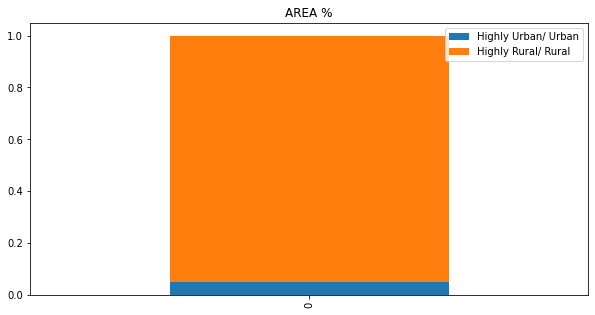

,Highly Urban/ Urban,Highly Rural/ Rural
Area,0.048798,0.951202


In [ ]:
data1 = data[data['CLAIM_IND'] == 1]
data1['Area'] = pd.cut(data1['AREA'], ['0', '1'], labels=['Highly Urban/ Urban'])

temp_list = [x for x in data1['Area'] if x == 'Highly Urban/ Urban']
GP1 = len(temp_list)/len(data1)
temp_list = [x for x in data1['Area'] if x != 'Highly Urban/ Urban']
GP2 = len(temp_list)/len(data1)

dataForInpt = {'Highly Urban/ Urban': [GP1], 'Highly Rural/ Rural': [GP2]}
data3 = pd.DataFrame.from_dict(dataForInpt)

data3.plot.bar(stacked=True, title ='AREA %',figsize=(10,5))
plt.show()
plt.close()

data3.rename(index={0: 'Area'})

In [ ]:
data.info()
data.isnull().any().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CHILD_DRIV    10300 non-null  int64  
 1   AGE           10300 non-null  float64
 2   CHILDREN      10300 non-null  int64  
 3   YOJ           10300 non-null  float64
 4   INCOME        10300 non-null  float64
 5   HOUSE_VAL     10300 non-null  float64
 6   STATUS        10300 non-null  int64  
 7   GENDER        10300 non-null  int64  
 8   EDU_LEVEL     10300 non-null  int64  
 9   DISTANCE      10300 non-null  int64  
 10  CAR_USE       10300 non-null  int64  
 11  VEHICLE_VAL   10300 non-null  object 
 12  VEHICLE_TYPE  10300 non-null  int64  
 13  CLM_FREQ      10300 non-null  int64  
 14  REVOKED       10300 non-null  int64  
 15  MVR_PTS       10300 non-null  int64  
 16  CLAIM_AMOUNT  10300 non-null  float64
 17  VEHICLE_AGE   10300 non-null  float64
 18  CLAIM_IND     10300 non-nu

False

In [ ]:
data.head()

,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,DISTANCE,CAR_USE,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
0,0,67.0,0,14.0,53841.0,359229.0,0,0,0,71,0,21970,0,0,0,2,294.0,12.0,0,0,0
1,0,26.0,1,13.0,16999.0,265527.0,1,1,1,50,0,4010,9,4,0,7,292.0,12.0,0,0,1
2,0,71.0,0,17.0,960.0,323918.0,1,0,1,77,0,15440,1,0,0,0,387.0,8.0,0,0,2
3,0,68.0,0,15.0,115546.0,361705.0,1,1,2,81,0,18000,9,4,1,3,308.0,19.0,0,0,2
4,0,32.0,1,15.0,125861.0,70668.0,0,1,0,91,1,17430,2,0,0,0,3221.0,9.0,1,0,2


In [ ]:
data.describe()

,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,DISTANCE,CAR_USE,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,CLAIM_AMOUNT,VEHICLE_AGE,CLAIM_IND,AREA,STATE_CODE
count,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,1.030000e+04,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000
mean,0.170000,53.798058,0.720971,13.555146,59034.467864,4.015152e+05,0.600874,0.538350,1.220000,78.419417,0.367767,4.469126,1.808641,0.122427,3.202621,1810.642718,9.845146,0.266602,0.201165,2.868544
std,0.507381,13.167728,1.116310,4.013180,48223.733178,2.375266e+05,0.489743,0.498551,1.059887,15.869675,0.482221,3.139028,1.528187,0.327794,2.585899,4725.594945,5.806924,0.442204,0.400891,2.091926
min,0.000000,5.000000,0.000000,3.000000,560.000000,0.000000e+00,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.000000,-1.000000,0.000000,0.000000,-1.000000
25%,0.000000,45.000000,0.000000,12.000000,23573.000000,2.217335e+05,0.000000,0.000000,0.000000,67.000000,0.000000,1.000000,0.000000,0.000000,2.000000,278.000000,3.000000,0.000000,0.000000,2.000000
50%,0.000000,54.000000,0.000000,15.000000,51407.500000,3.710070e+05,1.000000,1.000000,1.000000,78.000000,0.000000,4.000000,2.000000,0.000000,3.000000,323.000000,10.000000,0.000000,0.000000,2.000000
75%,0.000000,63.000000,1.000000,16.000000,84135.000000,5.457458e+05,1.000000,1.000000,2.000000,89.000000,1.000000,9.000000,3.000000,0.000000,5.000000,1445.750000,14.000000,1.000000,0.000000,4.000000
max,4.000000,103.000000,5.000000,26.000000,367590.000000,1.586073e+06,1.000000,1.000000,3.000000,187.000000,1.000000,9.000000,7.000000,1.000000,17.000000,123616.000000,30.000000,1.000000,1.000000,8.000000
